# UnifiedGenderNet —  Tests

This notebook organizes your original Colab script into clear steps:
1. **Environment & Paths**
2. **Clone Repository**
3. **Install Dependencies**
4. **Environment Check**
5. **Import Package**
6. **Forward Pass**
7. **Download & Load Checkpoints**
8. **Optional: Download Sample Data**
9. **Inference on a Sample Image**


## 1) Environment & Paths

In [1]:
from pathlib import Path
import shutil

# Base working directory (change if desired)
BASE_DIR = Path.cwd()
REPO_DIR = BASE_DIR / "UnifiedGenderNet"

# (Optional) Clean out an existing clone to start fresh
if REPO_DIR.exists():
    print(f"Removing existing repo at: {REPO_DIR}")
    shutil.rmtree(REPO_DIR)
else:
    print("No previous repo found. Proceeding.")

BASE_DIR, REPO_DIR

No previous repo found. Proceeding.


(PosixPath('/content'), PosixPath('/content/UnifiedGenderNet'))

## 2) Clone Repository

In [2]:
!git clone https://github.com/PatternBiometrics/UnifiedGenderNet.git
%cd UnifiedGenderNet
print("Repository cloned and working directory changed to:", Path.cwd())

Cloning into 'UnifiedGenderNet'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 140 (delta 53), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (140/140), 193.66 KiB | 11.39 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/UnifiedGenderNet
Repository cloned and working directory changed to: /content/UnifiedGenderNet


## 3) Install Dependencies

In [ ]:
# Using pip in Jupyter is usually fine; in Colab this is equivalent to a normal pip install.
from IPython.display import clear_output
!pip install -r requirements.txt
clear_output()
print("Dependencies installed.")


## 4) Environment Check

In [4]:
import torch, timm, pandas as pd
print("Torch:", torch.__version__)
print("Timm :", timm.__version__)
print("CUDA available:", torch.cuda.is_available())

Torch: 2.8.0+cu126
Timm : 1.0.19
CUDA available: False


## 5) Import Package Modules

In [5]:
from UnifiedGenderNet.src.ugnet.models.umcc import UMCC
from UnifiedGenderNet.src.ugnet.models.mag import MAG
from UnifiedGenderNet.src.ugnet.utils.checkpoint import load_state
print("UMCC and MAG imported successfully ✅")

UMCC and MAG imported successfully ✅


## 6) Forward Pass with Dummy Data

In [6]:
x = torch.randn(2, 3, 224, 224)  # 2 fake images
flag = torch.tensor([[1, 0], [0, 1]]).float()  # one hand, one face

umcc = UMCC(backbone="tf_efficientnetv2_s")
logits = umcc(x, flag)
print("UMCC logits:", logits)

mag = MAG(backbone="tf_efficientnetv2_s")
logits2 = mag(x)
print("MAG logits:", logits2)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/86.5M [00:00<?, ?B/s]

UMCC logits: tensor([-0.3038,  0.0967], grad_fn=<SqueezeBackward1>)
MAG logits: tensor([-0.2012, -0.0207], grad_fn=<AddBackward0>)


## 7) Download & Load Checkpoints

This will fetch the best checkpoints for UMCC and MAG using the repo's helper scripts, then load them.

In [7]:
!python scripts/download_checkpoints.py --best-umcc
!python scripts/download_checkpoints.py --best-mag

from pathlib import Path

# Example checkpoint paths (adjust if script saves under different names)
ckpt_umcc = Path("checkpoints/1752668630.pt")
ckpt_mag  = Path("checkpoints/tf_efficientnetv2_s.in1k_F0_Af_Lb_Z0_gating=soft_seed42.pt")

print("UMCC checkpoint exists:", ckpt_umcc.exists(), ckpt_umcc)
print("MAG  checkpoint exists:", ckpt_mag.exists(), ckpt_mag)

# Load into fresh model instances
umcc = UMCC(backbone="tf_efficientnetv2_s")
if ckpt_umcc.exists():
    umcc = load_state(umcc, str(ckpt_umcc))
    print("Checkpoint loaded into UMCC ✅")
else:
    print("UMCC checkpoint not found — please verify the path above.")

mag = MAG(backbone="tf_efficientnetv2_s")
if ckpt_mag.exists():
    mag = load_state(mag, str(ckpt_mag))
    print("Checkpoint loaded into MAG ✅")
else:
    print("MAG checkpoint not found — please verify the path above.")

Downloading...
From (original): https://drive.google.com/uc?id=1yK36dx8mdG5dvxZNNc50pHoALl77M9jX
From (redirected): https://drive.google.com/uc?id=1yK36dx8mdG5dvxZNNc50pHoALl77M9jX&confirm=t&uuid=2d049b59-b2d9-4534-8e1b-49bd2f284276
To: /content/UnifiedGenderNet/checkpoints/1752668630.pt
100% 81.6M/81.6M [00:01<00:00, 48.7MB/s]
Done.
checkpoints/tf_efficientnetv2_s.in1k_F0_Af_Lb_Z0_gating=soft_seed42.pt
Downloading...
From (original): https://drive.google.com/uc?id=1dtaaEXrHwNI_vhO327DyUL74_5gFCeSX
From (redirected): https://drive.google.com/uc?id=1dtaaEXrHwNI_vhO327DyUL74_5gFCeSX&confirm=t&uuid=d2c39fbe-6f79-496b-97b3-68bca556945a
To: /content/UnifiedGenderNet/checkpoints/tf_efficientnetv2_s.in1k_F0_Af_Lb_Z0_gating=soft_seed42.pt
100% 246M/246M [00:03<00:00, 72.4MB/s]
Done.
UMCC checkpoint exists: True checkpoints/1752668630.pt
MAG  checkpoint exists: True checkpoints/tf_efficientnetv2_s.in1k_F0_Af_Lb_Z0_gating=soft_seed42.pt
Checkpoint loaded into UMCC ✅
Checkpoint loaded into MAG ✅


## 8) (Optional) Download Derived HaGRID Dataset

If you need a sample dataset, the repo provides a helper script. You can skip this if you already have images locally.

In [10]:
!python scripts/download_derived_hagrid.py

Skip: data/Shared_Derived_HaGRID_unified_Model_For_Sex_Prediction/train.csv exists.
Skip: data/Shared_Derived_HaGRID_unified_Model_For_Sex_Prediction/val.csv exists.
Skip: data/Shared_Derived_HaGRID_unified_Model_For_Sex_Prediction/test.csv exists.
Downloading...
From (original): https://drive.google.com/uc?id=1-52CWGkVhs4k3uWtvAdSz7tvplSX0_84
From (redirected): https://drive.google.com/uc?id=1-52CWGkVhs4k3uWtvAdSz7tvplSX0_84&confirm=t&uuid=0f7cbb73-47ae-45ac-a9c0-46a0dcdc3f9c
To: /content/UnifiedGenderNet/data/Shared_Derived_HaGRID_unified_Model_For_Sex_Prediction/aligned_dataset.zip
100% 288M/288M [00:01<00:00, 145MB/s]
Unzipping aligned_dataset.zip → data/Shared_Derived_HaGRID_unified_Model_For_Sex_Prediction/images/content/aligned_dataset
Unzip done.
All done.


## 9) Inference on a Sample Image

Looks for any `*.jpg` under `data/` and runs `UMCC.infer` on it. Change `modality` to `"hand"` if needed.

Using sample: data/Shared_Derived_HaGRID_unified_Model_For_Sex_Prediction/images/content/content/aligned_dataset/faces/F_07fff175-3284-4969-af47-17f9ef064638.jpg


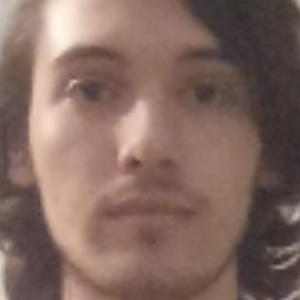

In [11]:
from PIL import Image
import torchvision.transforms as T

data_dir = Path("data")
imgs = list(data_dir.rglob("*.jpg")) if data_dir.exists() else []
if not imgs:
    raise FileNotFoundError("No JPG images found under ./data — download data or adjust the path.")

sample_img_path = imgs[0]
print("Using sample:", sample_img_path)

img = Image.open(sample_img_path).convert("RGB")
tf = T.Compose([T.Resize((224, 224)), T.ToTensor()])
x = tf(img).unsqueeze(0)

display(img)


In [12]:

prob = umcc.infer(x, modality="face")  # or "hand"
print("Predicted probability (male):", float(prob))

Predicted probability (male): 0.9999966621398926
